# EDA and Data Cleaning of Marvel Characters' Data

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Loading the Dataset

In [11]:
df = pd.read_csv('marvelscraping/characters.csv')

In [12]:
df.head()

,Name,Gender,Marital_Status,Height,Weight,Eye_Color,Hair_Color,Living_Status,Reality,Birthplace,Identity,Citizenship,Year_Introduced,Appearances
0,A'Lars (Earth-9997),Male,Married,NaN,NaN,Blue,Black,Alive,Earth-9997,NaN,Secret,Titan,2000.0,2.0
1,A'Kurru U'mbaya (Earth-616),Male,Single,NaN,NaN,White,No Hair At All,Alive,Earth-616,NaN,Secret,Wakandan,1992.0,2.0
2,A'Lars (Earth-616),Male,Married,1.85,95.25,Blue,Black,Alive,Earth-616,NaN,Public,Titanian Eternals,1972.0,65.0
3,'Lectron (Earth-12772),Male,NaN,NaN,NaN,NaN,NaN,Alive,Earth-12772,NaN,Secret,NaN,1997.0,1.0
4,A'Kane (Earth-616),Female,Widowed,NaN,NaN,NaN,Black,Deceased,Earth-616,Wakanda,No Dual,Wakandan,1995.0,1.0


In [13]:
df.shape

(74445, 14)

We look at the data types of each column. From this, we see that only the height, weight, and the number of appearances are numerical, with the rest being categorical.

In [14]:
df.dtypes

Name                object
Gender              object
Marital_Status      object
Height             float64
Weight             float64
Eye_Color           object
Hair_Color          object
Living_Status       object
Reality             object
Birthplace          object
Identity            object
Citizenship         object
Year_Introduced    float64
Appearances        float64
dtype: object

We then proceed with clearning each of the categorical columns, starting with Gender. In particular, we look at all the unique values for each categorical column and fix misspellings, inconsistent capitalizations, etc.

In [15]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Agender', 'Non-Binary', 'Genderfluid',
       'Male/Female', 'female', 'Gestalt', 'Transgender', 'Single'],
      dtype=object)

In [16]:
df['Gender'].replace({'female' : 'Female', 'Male/Female' : np.nan, 'Single' : np.nan, 'Gestalt' : np.nan}, inplace = True)
df['Gender'].unique()

array(['Male', 'Female', nan, 'Agender', 'Non-Binary', 'Genderfluid',
       'Transgender'], dtype=object)

We do the same for Marital_Status.

In [17]:
df['Marital_Status'].unique()

array(['Married', 'Single', nan, 'Widowed', 'Separated', 'Divorced',
       'Engaged', 'Unknown.', 'Divorces', 'Unknown',
       'Married\x7f\'"`UNIQ--ref-00000008-QINU`"\'\x7f', 'Unnamed',
       'Blond', 'single', 'Windowed', 'Estranged'], dtype=object)

In [18]:
df['Marital_Status'].replace({'Windowed' : 'Widowed', 'single' : 'Single', 'Unknown.' : np.nan,
                            'Blond' : np.nan, 'Unnamed' : np.nan, 
                            'Divorces' : 'Divorced', 'Unknown' : np.nan, 
                            'Married\x7f\'"`UNIQ--ref-00000008-QINU`"\'\x7f' : 'Married'},
                    inplace = True)
df['Marital_Status'].unique()

array(['Married', 'Single', nan, 'Widowed', 'Separated', 'Divorced',
       'Engaged', 'Estranged'], dtype=object)

We proceed with Eye_Color. To make this process easier, we first fix the capitalization inconsistencies before doing a replace operation.

In [19]:
df['Eye_Color'].unique()

array(['Blue', 'White', nan, 'Brown', 'Grey', 'No Eyes At All', 'Red',
       'Black', 'Hazel', 'Green', 'Yellow', 'Purple', 'Gold', 'Orange',
       'Pink', 'Variable', 'Fair', 'Amber', 'Dark', 'Violet', 'black',
       'Silver', 'No Visible', 'hazel', 'Compound', 'Magenta',
       'Brown-Grey', 'blue', 'yellow', 'no visible pupil or iris', 'red',
       'No Iris', 'white', 'No visible Irises or Pupils',
       'no visible pupils', 'brown'], dtype=object)

In [20]:
df['Eye_Color'] = df['Eye_Color'].apply(lambda x : str(x).capitalize())
df['Eye_Color'].unique()

array(['Blue', 'White', 'Nan', 'Brown', 'Grey', 'No eyes at all', 'Red',
       'Black', 'Hazel', 'Green', 'Yellow', 'Purple', 'Gold', 'Orange',
       'Pink', 'Variable', 'Fair', 'Amber', 'Dark', 'Violet', 'Silver',
       'No visible', 'Compound', 'Magenta', 'Brown-grey',
       'No visible pupil or iris', 'No iris',
       'No visible irises or pupils', 'No visible pupils'], dtype=object)

In [21]:
df['Eye_Color'].replace({'Nan' : np.nan, 'Fair' : np.nan, 'Dark' : np.nan, 
                        'No visible pupils' : 'No visible iris and/or pupils',
                        'No visible' : 'No visible iris and/or pupils',
                        'No visible pupil or iris' : 'No visible iris and/or pupils',
                        'No iris' : 'No visible iris and/or pupils',
                        'No visible irises or pupils' : 'No visible iris and/or pupils'},
                        inplace = True)
df['Eye_Color'].unique()

array(['Blue', 'White', nan, 'Brown', 'Grey', 'No eyes at all', 'Red',
       'Black', 'Hazel', 'Green', 'Yellow', 'Purple', 'Gold', 'Orange',
       'Pink', 'Variable', 'Amber', 'Violet', 'Silver',
       'No visible iris and/or pupils', 'Compound', 'Magenta',
       'Brown-grey'], dtype=object)

We do the same for Hair_Color.

In [22]:
df['Hair_Color'].unique()

array(['Black', 'No Hair At All', nan, 'White', 'Blond', 'Brown', 'Grey',
       'Bald', '[1]', 'Red', 'Pink', 'Green', 'Auburn', 'Purple', 'Gold',
       'Strawberry Blond', '[4]', 'Blue', 'Silver', 'Orange', 'Dyed',
       'Variable', 'Shaved', 'Yellow', 'black', 'Light Brown', 'green',
       'Magenta', 'blue', '[3]', 'Platinum Blond', '[2]', 'bald',
       'Hepzibah', 'grey', 'brown', '[11]', 'white', '[9]', 'green hair',
       'Orange-brown', 'pink', 'dyed', 'red', '[22]', '[37]', 'shaved'],
      dtype=object)

In [23]:
df['Hair_Color'] = df['Hair_Color'].apply(lambda x : str(x).capitalize())
df['Hair_Color'].unique()

array(['Black', 'No hair at all', 'Nan', 'White', 'Blond', 'Brown',
       'Grey', 'Bald', '[1]', 'Red', 'Pink', 'Green', 'Auburn', 'Purple',
       'Gold', 'Strawberry blond', '[4]', 'Blue', 'Silver', 'Orange',
       'Dyed', 'Variable', 'Shaved', 'Yellow', 'Light brown', 'Magenta',
       '[3]', 'Platinum blond', '[2]', 'Hepzibah', '[11]', '[9]',
       'Green hair', 'Orange-brown', '[22]', '[37]'], dtype=object)

In [24]:
df['Hair_Color'].replace({'Nan' : np.nan, '[1]' : np.nan, '[3]' : np.nan, '[2]' : np.nan, 'Hepzibah' : np.nan, 
                        '[22]' : np.nan, '[37]' : np.nan, '[4]' : np.nan, '[11]' : np.nan, '[9]' : np.nan,
                        'Green hair' : 'Green'},
                        inplace = True)
df['Hair_Color'].unique()

array(['Black', 'No hair at all', nan, 'White', 'Blond', 'Brown', 'Grey',
       'Bald', 'Red', 'Pink', 'Green', 'Auburn', 'Purple', 'Gold',
       'Strawberry blond', 'Blue', 'Silver', 'Orange', 'Dyed', 'Variable',
       'Shaved', 'Yellow', 'Light brown', 'Magenta', 'Platinum blond',
       'Orange-brown'], dtype=object)

Upon looking at Living_Status, we see that all of its entries are spelled properly and is already clean, so we leave it as is.

In [25]:
df['Living_Status'].unique()

array(['Alive', 'Deceased', nan], dtype=object)

We now proceed to Reality. As expected, majority of its entries are prefixed with "Earth-", as this is the usual way of specifying the different realities in the Marvel Multiverse. 

In [26]:
df['Reality'].unique()

array(['Earth-9997', 'Earth-616', 'Earth-12772', ..., 'Earth-18853',
       'Earth-89947', 'Earth-14114'], dtype=object)

We consider all entries in this column that does not have a prefix of "Earth-". Upon searching these online, I realized that most of these realities are outside the Marvel Multiverse, and so they don't follow the convention earlier. We simply replace "Unknown Reality" with a null value, since the rest are already formatted cleanly.

In [27]:
[reality for reality in list(df['Reality'].unique()) if str(reality)[:6] != 'Earth-']

['Multiverse',
 'Ideaverse',
 'Land of Cancelled Heroes',
 'Unknown Reality',
 nan,
 'Mojoverse',
 'Otherworld',
 'Styrakos',
 'First Cosmos',
 'Brilliant City',
 'Utopian Parallel',
 'Omniverse',
 'Elsewhen']

In [28]:
df['Reality'].replace({'Unknown Reality' : np.nan}, inplace = True)
[reality for reality in list(df['Reality'].unique()) if str(reality)[:6] != 'Earth-']

['Multiverse',
 'Ideaverse',
 'Land of Cancelled Heroes',
 nan,
 'Mojoverse',
 'Otherworld',
 'Styrakos',
 'First Cosmos',
 'Brilliant City',
 'Utopian Parallel',
 'Omniverse',
 'Elsewhen']

We now proceed with Identity. We do the same process as the ones we had earlier.

In [29]:
df['Identity'].unique()

array(['Secret', 'Public', 'No Dual', nan, 'Known to Authorities',
       'No  Dual', 'Human', '[1]'], dtype=object)

In [30]:
df['Identity'].replace({'No Dual' : 'No Dual Identity', 'No  Dual' : 'No Dual Identity', 'Human' : np.nan, '[1]' : np.nan},
                        inplace = True)
df['Identity'].unique()

array(['Secret', 'Public', 'No Dual Identity', nan,
       'Known to Authorities'], dtype=object)

We now proceed with Birthplace.

In [31]:
df['Birthplace'].unique()

array([nan, 'Wakanda', 'Legion', ..., 'Nadua', 'Sumeria', 'Meroê'],
      dtype=object)

In [32]:
df['Birthplace'].nunique()

1248

In [33]:
df['Birthplace'] = df['Birthplace'].apply(lambda x : str(x).strip())
df['Birthplace'].replace({'nan' : np.nan}, inplace = True)
df['Birthplace'].nunique()

1248

As seen above, the Birthplace feature has a lot of unique values, and stripping these values did not result to them being reduced. Due to this, later on in the model-building process, we try a configuration that does not involve this feature, as it was not fully cleaned. The same observation and process will be done for the Citizenship feature, as seen below.

In [34]:
df['Citizenship'].unique()

array(['Titan', 'Wakandan', 'Titanian Eternals', nan, 'American',
       'Latverian', 'Belgian', 'British', 'Dutch', 'Polish', 'German',
       'Canada', 'Canadian', 'Atlantean', 'English', 'Scottish',
       'Krakoan', 'South African', 'Chronicoms', 'Saudi Arabian',
       'Afghan', 'Egyptian', 'Turanian', 'Azerbaijani', 'Zamoran',
       'Aqiria', 'Saudi Arabia', "Shi'ar Empire", 'Austrian', 'Japanese',
       'Xandarian', 'New Canaanite', 'Ethiopia', 'Tanzanian', 'African',
       'French', 'Indian', 'Madripoor', 'Nor-Am Pact region', 'America',
       'Soviet', 'Acroyears', 'Vietnamese', 'Watcher', 'Corinthia',
       'Turan', 'Greek', 'Olympian', 'Atlanteans', 'Ghudazan', 'Watchers',
       'Persian', 'Aakon', 'Technarch', 'Alfheim', 'Kymellian', 'Spanish',
       'Kree Empire', 'Mycenaean', 'Attilan', 'Australian', 'Vanaheim',
       'Asgardian', 'Jotunheim', 'Breakworldians', 'Polaria', 'Irish',
       'Nemedian', 'Skrull Empire', 'Italian', 'Japan', 'Wakanda',
       'Shemite',

In [35]:
df['Citizenship'].nunique()

732

In [36]:
df['Citizenship'] = df['Citizenship'].apply(lambda x : str(x).strip())
df['Citizenship'].replace({'nan' : np.nan}, inplace = True)
df['Citizenship'].nunique()

732

We now take a look at the percentage of Missing Values for each feature. As seen below, a huge majority of the height and weight features are missing. The rest of the features also have a lot of missing features, save for gender, living status, reality, appearances, and year_introduced. Due to these issues, it is ideal to perform recursive feature elimination (RFE) later on in the model-building process, as some features may not be useful to the prediction process at all.

In [37]:
df.isna().sum() / len(df) * 100

Name                0.000000
Gender              2.806098
Marital_Status     55.196454
Height             92.977366
Weight             93.521392
Eye_Color          54.753173
Hair_Color         26.033985
Living_Status       0.024179
Reality             0.917456
Birthplace         88.141581
Identity           14.734368
Citizenship        28.574115
Year_Introduced     8.662771
Appearances         6.391296
dtype: float64

In order to get a better sense of "popularity", we will predict the average number of appearances of each character per year. We simply create a new column for this target variable, using both the Appearances and Year_Introduced features. We then remove all instances missing this new feature, since they will not be useful in the model-building process later.

In [38]:
df['Average_Annual_Appearances'] = df['Appearances'] / (2022 - df['Year_Introduced'])

In [39]:
(df.isna().sum() / len(df) * 100)['Average_Annual_Appearances']

13.771240513130497

In [40]:
print(df.shape)
df = df[df['Average_Annual_Appearances'].notna()]
print(df.shape)

(74445, 15)
(64193, 15)


We then take a look at our numerical features to see whether some values are off.

In [42]:
df.describe()

,Height,Weight,Year_Introduced,Appearances,Average_Annual_Appearances
count,4552.000000,4.238000e+03,64193.000000,64193.000000,64193.000000
mean,6.401979,4.175247e+05,1996.996588,6.893851,0.366309
std,106.591404,2.516991e+07,18.167927,50.996768,1.261046
min,0.000000,1.010000e+00,1936.000000,1.000000,0.012048
25%,1.730000,6.123000e+01,1989.000000,1.000000,0.040816
50%,1.800000,8.165000e+01,2001.000000,1.000000,0.090909
75%,1.880000,1.043300e+02,2011.000000,4.000000,0.255814
max,6701.480000,1.632931e+09,2021.000000,4197.000000,69.950000


We see above how skewed our appearances and average annual appearances features are. In particular, we check whether there has been some error with regards to the max value of 4197 for appearances and 69.95 for average annual appearances, as these values seem to be way above the other values. Not suprisingly, we found out that these max values belong to Peter Parker (Spiderman) of the mainstream reality (Earth-616), which makes sense, since he is undoubtedly the most popular character in all of Marvel comics.

In [60]:
df[df['Appearances'] == 4197]

,Name,Gender,Marital_Status,Height,Weight,Eye_Color,Hair_Color,Living_Status,Reality,Identity,Year_Introduced,Appearances,Average_Annual_Appearances
40729,Peter Parker (Earth-616),Male,Single,1.78,75.75,Hazel,Brown,Alive,Earth-616,Secret,1962.0,4197.0,69.95


We now proceed with some visualizations. For each categorical feature, we plot a bar graph with respect to count and a boxplot with respect to Average_Annual_Appearances. To make our graphs more readable, we limit ourselves to the top 25 categories in terms of count. We also add the option of rotating the labels in case our plots become quite messy.

In [44]:
def plot_bar_box(cat, rotate = False):
    fig, ax = plt.subplots(nrows = 2, sharex = False, sharey = False, figsize = (12,8), constrained_layout = True)
    fig.suptitle(f"Marvel Characters' {cat}")
    order = list(df[cat].value_counts().index) # orders the categories by count
    if len(order) <= 25:
        data = df
    else:
        data = df[df[cat].isin(order[:25])]
        order = order[:25]
    countplot = sns.countplot(data = data, x = cat, order = order, ax = ax[0])
    countplot.set_yscale("log")
    boxplot = sns.boxplot(data = data, x = cat, y = 'Average_Annual_Appearances', order = order, ax = ax[1])
    boxplot.set_yscale("log")
    if rotate:
        fig.autofmt_xdate()
    plt.show()

import warnings
warnings.filterwarnings("ignore")

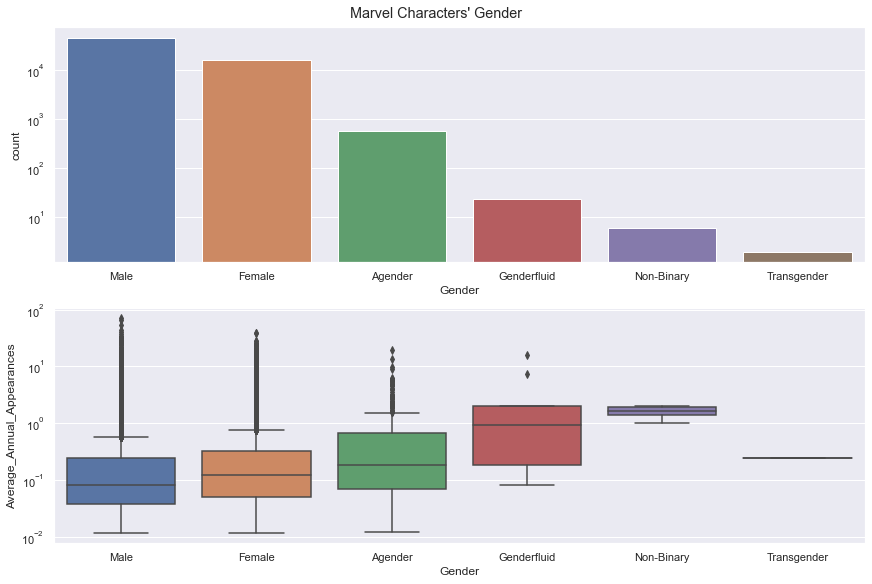

In [45]:
plot_bar_box('Gender')

As seen above, majority of Marvel characters are male or female, with the rest of the other categories at a lower order of magnitude as compared to the two.

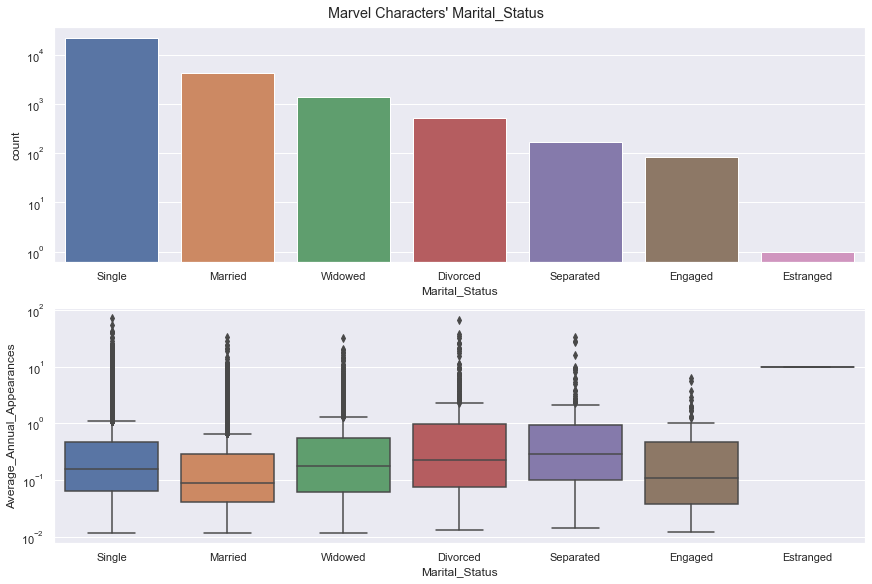

In [46]:
plot_bar_box('Marital_Status')

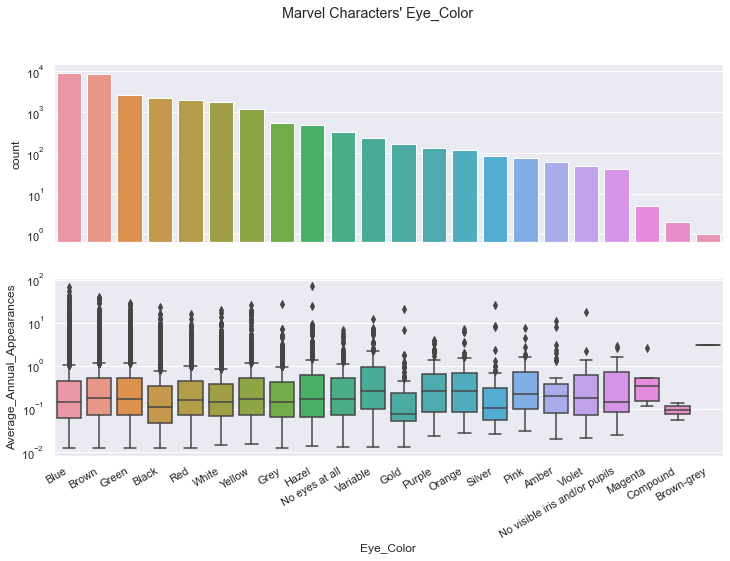

In [47]:
plot_bar_box('Eye_Color', True)

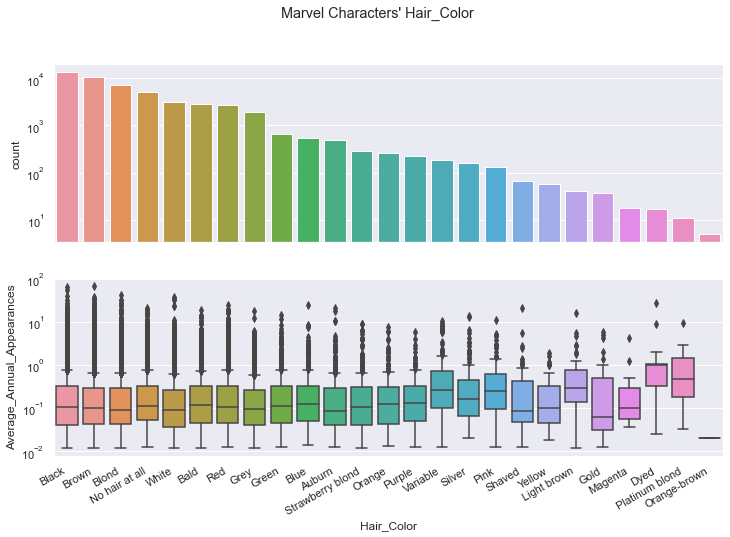

In [48]:
plot_bar_box('Hair_Color', True)

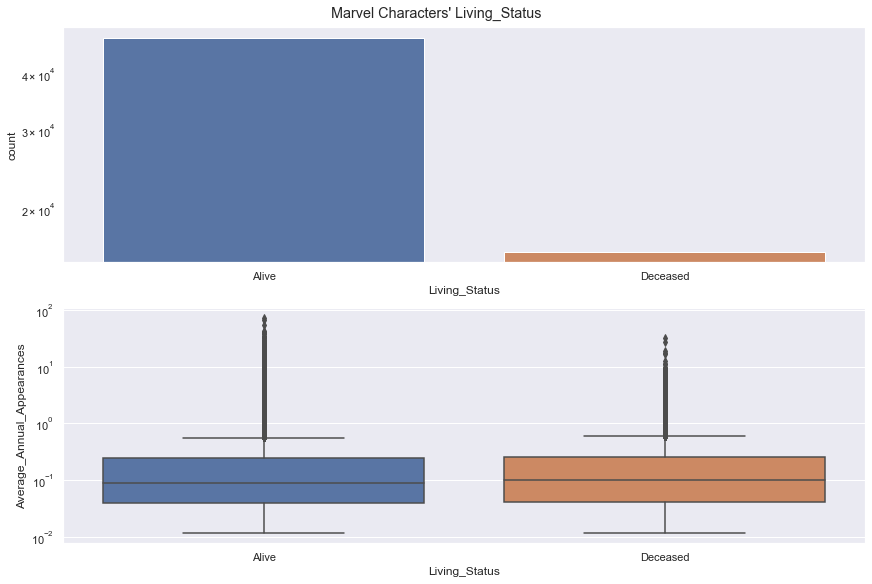

In [49]:
plot_bar_box('Living_Status')

As expected, majority of the characters are alive, but suprisingly, the median value and 75th percentile for the Average_Annual_Appearances of deceased characters are higher compared to that of living characters.

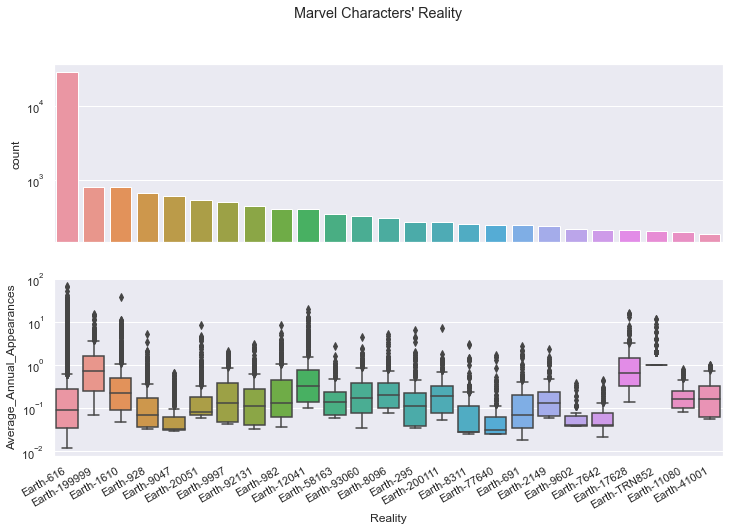

In [50]:
plot_bar_box('Reality', True)

As expected, Earth-616 characters dominate Marvel comics, as this reality is the mainstream reality of this comic franchise.

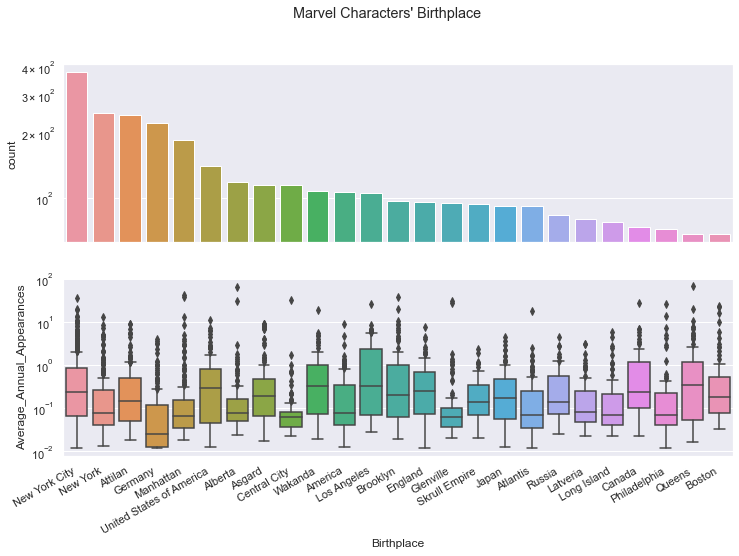

In [51]:
plot_bar_box('Birthplace', True)

As seen above, the Birthplace feature seems to be very inconsistent, as the hierarchies of the places (eg. Queens is in New York which is in United States which is in America) are quite evident. Hence, we decide to drop the Birthplace feature altogether.

In [52]:
df = df.drop('Birthplace', 1)
df.shape

(64193, 14)

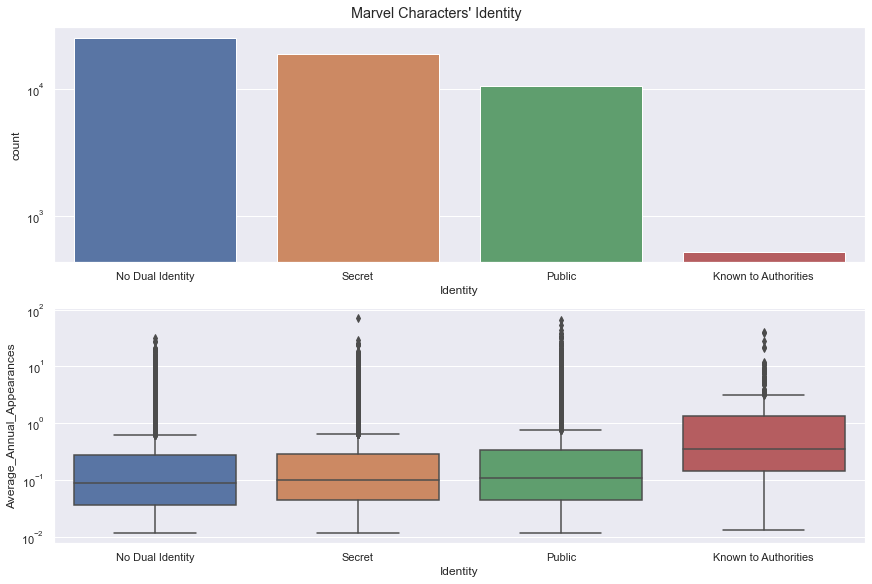

In [53]:
plot_bar_box('Identity')

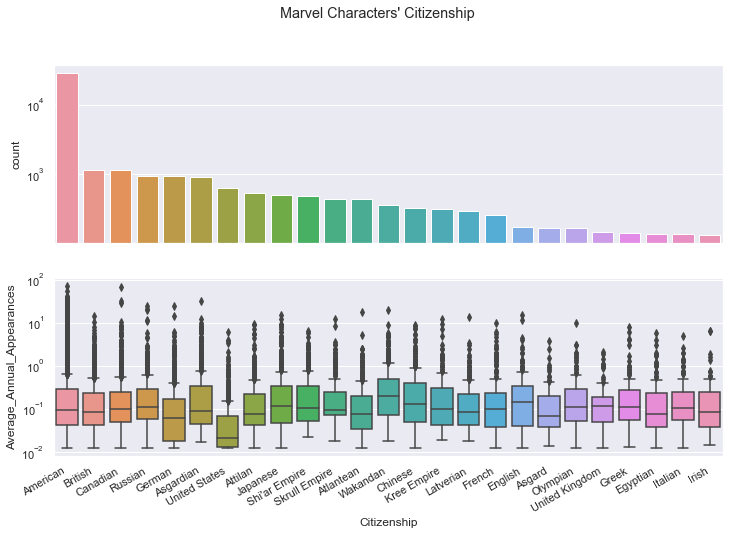

In [54]:
plot_bar_box('Citizenship', True)

Similar to the Birthplace feature, the Citizenship feature is also very inconsistent. We decide to drop this feature for now, although fixing both features is possible given more time and manpower.

In [55]:
df = df.drop('Citizenship', 1)
df.shape

(64193, 13)

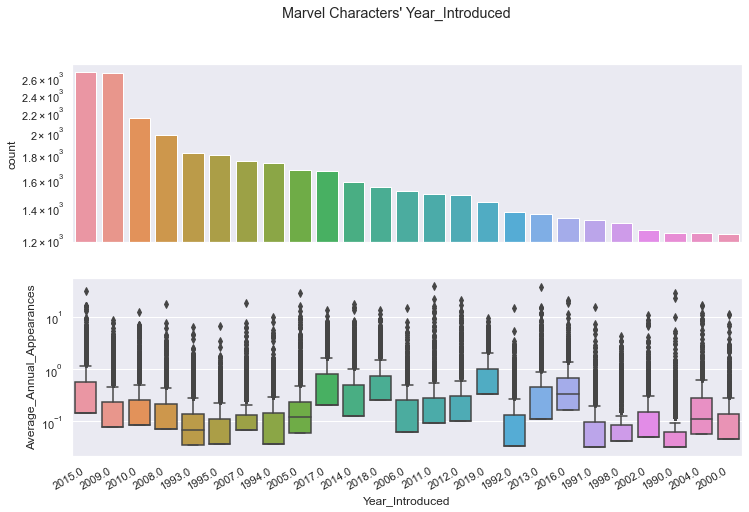

In [56]:
plot_bar_box('Year_Introduced', True)

We now proceed in plotting scatterplots for both Height and Weight with respect to Average_Annual_Appearances.

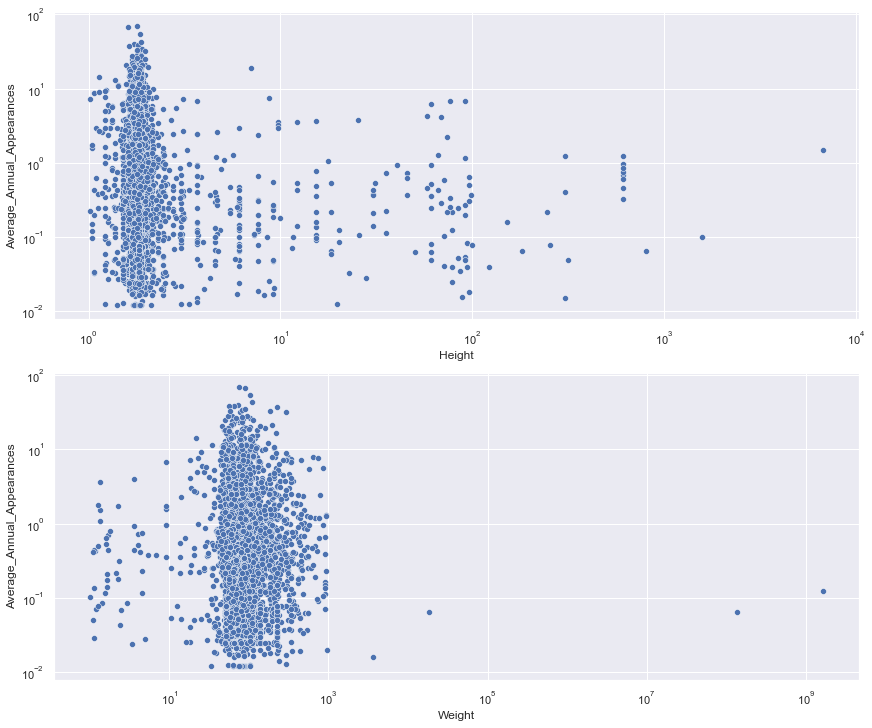

In [57]:
fig, ax = plt.subplots(nrows = 2, sharex = False, sharey = False, figsize = (12,10), constrained_layout = True)
height_scatter = sns.scatterplot(data = df, x = 'Height', y = 'Average_Annual_Appearances', ax = ax[0])
height_scatter.set_yscale("log")
height_scatter.set_xscale("log")
weight_scatter = sns.scatterplot(data = df, x = 'Weight', y = 'Average_Annual_Appearances', ax = ax[1])
weight_scatter.set_yscale("log")
weight_scatter.set_xscale("log")
plt.show()

As seen above, the height values are mostly in the 1-10 meter range, while the weight values are mostly in the 10-1000 kg range. Now that we are done with visualizing our dataset, we finally save our cleaned dataset to a new csv file.

In [58]:
df.shape

(64193, 13)

In [59]:
df.to_csv('characters_cleaned.csv')